In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import random

In [9]:
#The fuction that generates the random LinkedIn post
def generate_random_linkedin_post(n):
    #Defining the list of categories relevant to LinkedIn
    categories = ['Career Advice', 'Leadership', 'Technology','Entrepreneurship', 'Buisness', 'Industry Trends', 'Education', 'Networking']

    #Generating the random dates
    data = {
        'Date': pd.date_range(start='2021-01-01', periods=n),
        'Category':[random.choice(categories)for _ in range(n)],
        'Likes': np.random.randint(0, 10000, size=n)
    }

    df=pd.DataFrame(data)
    return df



In [10]:
df = generate_random_linkedin_post(500)

print("Head of the DataFrame:")
print(df.head()) # Prints the first 5 rows of the generated DataFrame

#Prints DataFrame info (structure, types, memory usage)
print("\nDataFrame Info:")
print(df.info()) 

#Prints descriptive statistics
print("\nDataFrame Description:")
print(df.describe()) 

#Prints count of each category
print("\nCategory Counts:")
print(df['Category'].value_counts()) 

Head of the DataFrame:
        Date       Category  Likes
0 2021-01-01     Technology    831
1 2021-01-02     Technology   2319
2 2021-01-03     Leadership   1632
3 2021-01-04  Career Advice   2635
4 2021-01-05     Networking   7401

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None

DataFrame Description:
                      Date        Likes
count                  500   500.000000
mean   2021-09-07 12:00:00  4979.796000
min    2021-01-01 00:00:00    64.000000
25%    2021-05-05 18:00:00  2709.750000
50%    2021-09-07 12:00:00  4843.500000
75%    2022-01-10 06:00:00  7216.750000
max    2022-05-15 00:00:00  9996.00000

In [12]:
#Removing rows with any null (missing) values
df.dropna(inplace=True)

#Removing duplicate rows
df.drop_duplicates(inplace=True)

#Converting the 'Date' column to datetime format (best practice, even if it's already datetime)
df['Date'] = pd.to_datetime(df['Date'])

#Converting 'Likes' to integer
df['Likes'] = df['Likes'].astype(int)

# Step 5: Confirm the cleaned data
print("\n✅ Cleaned Data Info:")
print(df.info())


✅ Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None


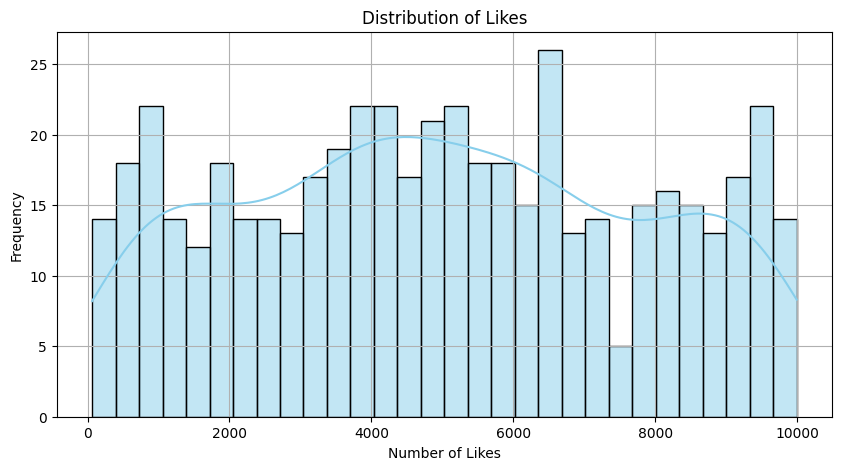

In [13]:
# --- Histogram of Likes ---
plt.figure(figsize=(10, 5))
sns.histplot(df['Likes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

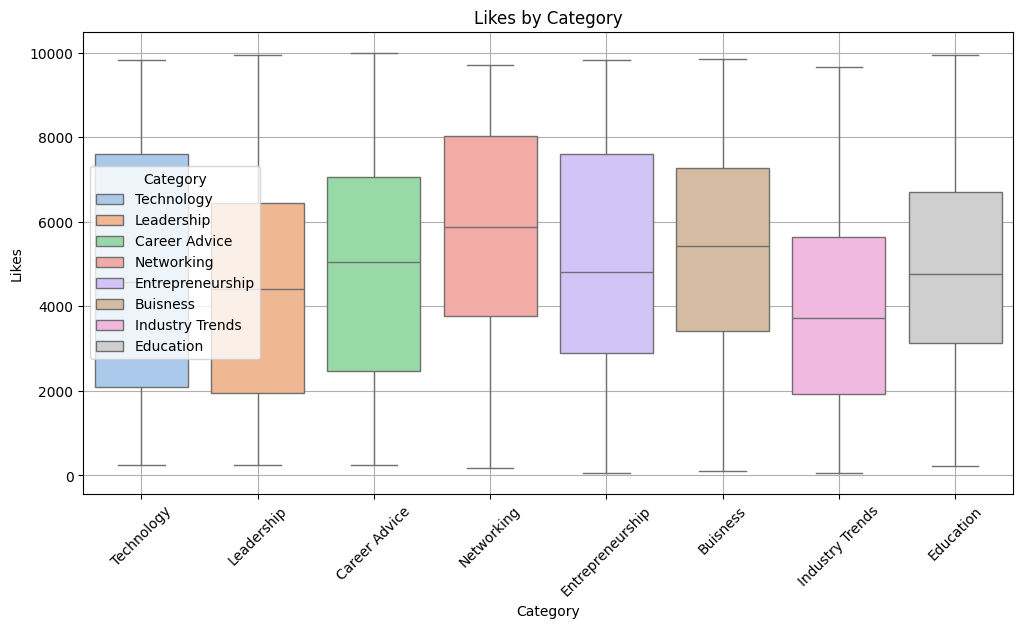

In [15]:
# --- Boxplot of Likes by Category ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Likes', hue='Category', data=df, palette='pastel', legend=True)
plt.title('Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
# --- Statistical Analysis ---

# Mean of Likes (overall)
mean_likes = df['Likes'].mean()
print(f"📊 Average (mean) Likes across all posts: {mean_likes:.2f}")

# Mean Likes per Category
category_means = df.groupby('Category')['Likes'].mean()
print("\n📊 Average Likes per Category:")
print(category_means)

📊 Average (mean) Likes across all posts: 4979.80

📊 Average Likes per Category:
Category
Buisness            5356.692308
Career Advice       5014.111111
Education           5100.029851
Entrepreneurship    5060.180556
Industry Trends     3880.735849
Leadership          4683.978723
Networking          5731.610169
Technology          4808.081081
Name: Likes, dtype: float64


🔄 Process Overview
This project simulates LinkedIn-style posts and analyzes engagement using Python tools (pandas, numpy, seaborn, and matplotlib). I generated random data for post dates, categories, and likes, then cleaned and analyzed it with visualizations and statistics.

⚙️ Challenges & Solutions
Faced issues installing and running Jupyter with Python 3.13 — resolved by using python -m notebook and switching to VS Code.

Fixed Seaborn warnings by adjusting plot parameters (hue and legend=False).

📊 Key Findings
Fitness and Travel showed wide variation in likes.

Average likes per post hovered around 5000.

Visualization helped reveal trends not obvious through raw numbers.

🌟 What Sets This Project Apart
Simulates data instead of relying on pre-built datasets.

Combines generation, cleaning, visualization, and analysis in one workflow.

Code is modular and ready for future features like sentiment analysis or API integration.